<a href="https://colab.research.google.com/github/s5263er/GameStop-Sentiment-and-Price-Analysis/blob/main/FIN_INFO_RET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
#IMPORTS
!pip install yfinance
import yfinance as yf
import pandas as pd
import datetime 
import datetime 
import matplotlib.pyplot as plt
import math
import string
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [199]:
#LAST 10 YEAR STOCK PRICE
start = datetime.datetime(2013,3,28) 
end = datetime.datetime(2023, 3 ,28)
GME = yf.Ticker("GME") 
df_gme = GME.history(start=start, end=end)
df_gme

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-03-28 00:00:00-04:00,4.459723,5.063772,4.459723,4.940136,39372800,0.0,0.0
2013-04-01 00:00:00-04:00,4.945435,5.311044,4.933072,5.256291,28086000,0.0,0.0
2013-04-02 00:00:00-04:00,5.252758,5.358732,5.132655,5.341070,16349200,0.0,0.0
2013-04-03 00:00:00-04:00,5.346369,5.406421,5.298681,5.342837,18020400,0.0,0.0
2013-04-04 00:00:00-04:00,5.335771,5.492966,5.208603,5.279252,17995200,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-21 00:00:00-04:00,17.150000,18.350000,17.139999,17.650000,15882900,0.0,0.0
2023-03-22 00:00:00-04:00,26.600000,27.000000,23.049999,23.870001,66764700,0.0,0.0
2023-03-23 00:00:00-04:00,22.570000,24.590000,22.129999,22.580000,11168900,0.0,0.0


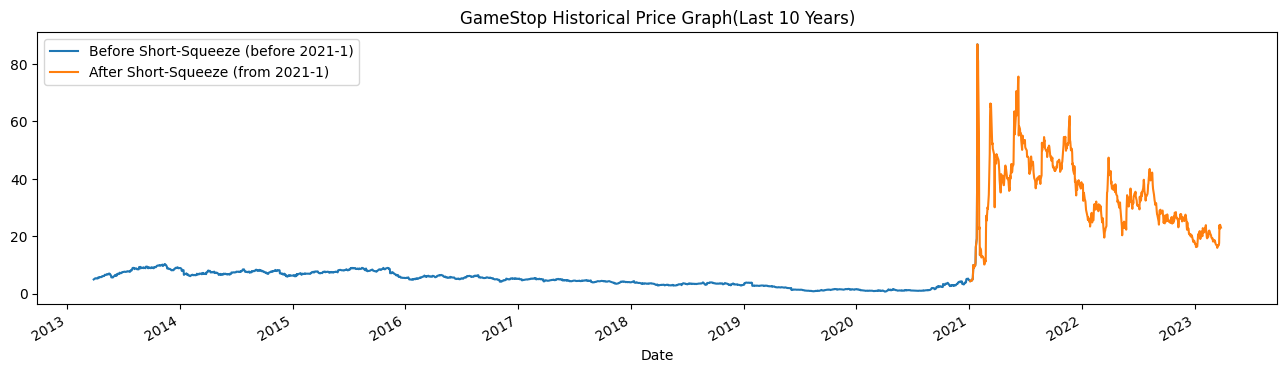

In [200]:
import matplotlib.pyplot as plt
df_gme["Close"][:'2021-1'].plot(figsize=(16,4), legend=True)
df_gme["Close"]["2021-1":].plot(figsize=(16,4), legend=True)
plt.legend(["Before Short-Squeeze (before 2021-1)", "After Short-Squeeze (from 2021-1)"])
plt.title("GameStop Historical Price Graph(Last 10 Years)")
plt.show()
plt.close()

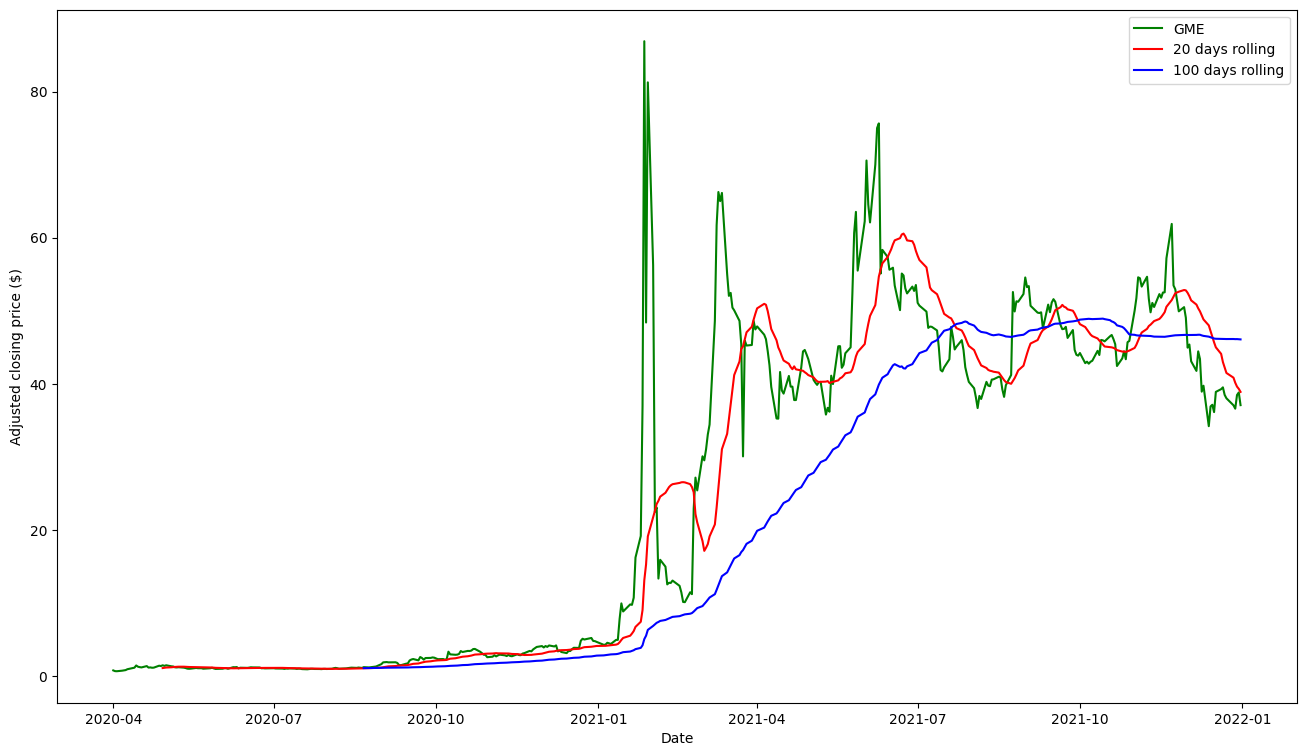

In [201]:
#COMPARING MOVING AVERAGES
df_gme_subset = df_gme["Close"]['2020-4':'2021-12']
short_rolling_gme = df_gme_subset.rolling(window=20).mean()
long_rolling_gme = df_gme_subset.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot( df_gme_subset, label='GME',color = "green")
ax.plot(short_rolling_gme, label='20 days rolling', color = "red")
ax.plot(long_rolling_gme, label='100 days rolling', color = "blue")

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

In [202]:

try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import certifi
import json

def get_jsonparsed_data(url):
    """
    Receive the content of ``url``, parse it as JSON and return the object.

    Parameters
    ----------
    url : str

    Returns
    -------
    dict
    """
    response = urlopen(url, cafile=certifi.where())
    data = response.read().decode("utf-8")
    return json.loads(data)

url = ("https://financialmodelingprep.com/api/v3/key-metrics/GME?apikey=731a4c8b60b5d3cc7ff6696c9a303e42")



print(get_jsonparsed_data(url))


<ipython-input-202-2370bd4f1f11>:23: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


[{'symbol': 'GME', 'date': '2023-03-02', 'period': 'FY', 'revenuePerShare': 0, 'netIncomePerShare': 0, 'operatingCashFlowPerShare': 0, 'freeCashFlowPerShare': 0, 'cashPerShare': 0, 'bookValuePerShare': 0, 'tangibleBookValuePerShare': 0, 'shareholdersEquityPerShare': 0, 'interestDebtPerShare': 0, 'marketCap': 0, 'enterpriseValue': -522400000, 'peRatio': 0, 'priceToSalesRatio': 0, 'pocfratio': 0, 'pfcfRatio': 0, 'pbRatio': 0, 'ptbRatio': 0, 'evToSales': 0, 'enterpriseValueOverEBITDA': 0, 'evToOperatingCashFlow': 0, 'evToFreeCashFlow': 0, 'earningsYield': None, 'freeCashFlowYield': 0, 'debtToEquity': 1.3545337669212736, 'debtToAssets': 0.5752874670777928, 'netDebtToEBITDA': 0, 'currentRatio': 1.7352699574340975, 'interestCoverage': 0, 'incomeQuality': 0, 'dividendYield': None, 'payoutRatio': 0, 'salesGeneralAndAdministrativeToRevenue': 0, 'researchAndDdevelopementToRevenue': 0, 'intangiblesToTotalAssets': 0, 'capexToOperatingCashFlow': 0, 'capexToRevenue': 0, 'capexToDepreciation': 0, 'st

In [203]:
df_fundamentals = {'date':[],
               'roe':[],
               'peRatio':[],
               'debtToEquity':[],
               'inventoryTurnover':[],
               }

for file in get_jsonparsed_data(url):

  date = file["date"]
  df_fundamentals['date'].append(date)

  roe = file["roe"]
  df_fundamentals['roe'].append(roe)

  peRatio = file["peRatio"]
  df_fundamentals['peRatio'].append(peRatio)

  debtToEquity = file["debtToEquity"]
  df_fundamentals['debtToEquity'].append(debtToEquity)

  inventoryTurnover = file["inventoryTurnover"]
  df_fundamentals['inventoryTurnover'].append(inventoryTurnover)

  



df_fundamentals = pd.DataFrame(df_fundamentals)
df_fundamentals = df_fundamentals[1:11]
df_fundamentals = df_fundamentals.loc[::-1].reset_index(drop=True)
df_fundamentals

<ipython-input-202-2370bd4f1f11>:23: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


,date,roe,peRatio,debtToEquity,inventoryTurnover
0,2013-02-02,-0.117964,-11.571435,0.807987,5.323316
1,2014-02-01,0.157324,11.604190,0.817269,5.320210
2,2015-01-31,0.190115,10.061180,1.053634,5.695405
3,2016-01-30,0.193561,6.897368,1.083085,5.542132
4,2017-01-28,0.156692,7.116801,1.207489,4.992064
5,2018-02-03,0.015669,47.427147,1.276631,4.525134
6,2019-02-02,-0.503667,-1.705207,2.026718,4.779848
7,2020-02-01,-0.770074,-0.713527,3.611120,5.301035
8,2021-01-30,-0.493016,-98.118904,4.662011,6.357344
9,2022-01-29,-0.237941,-18.642187,1.183651,5.096066


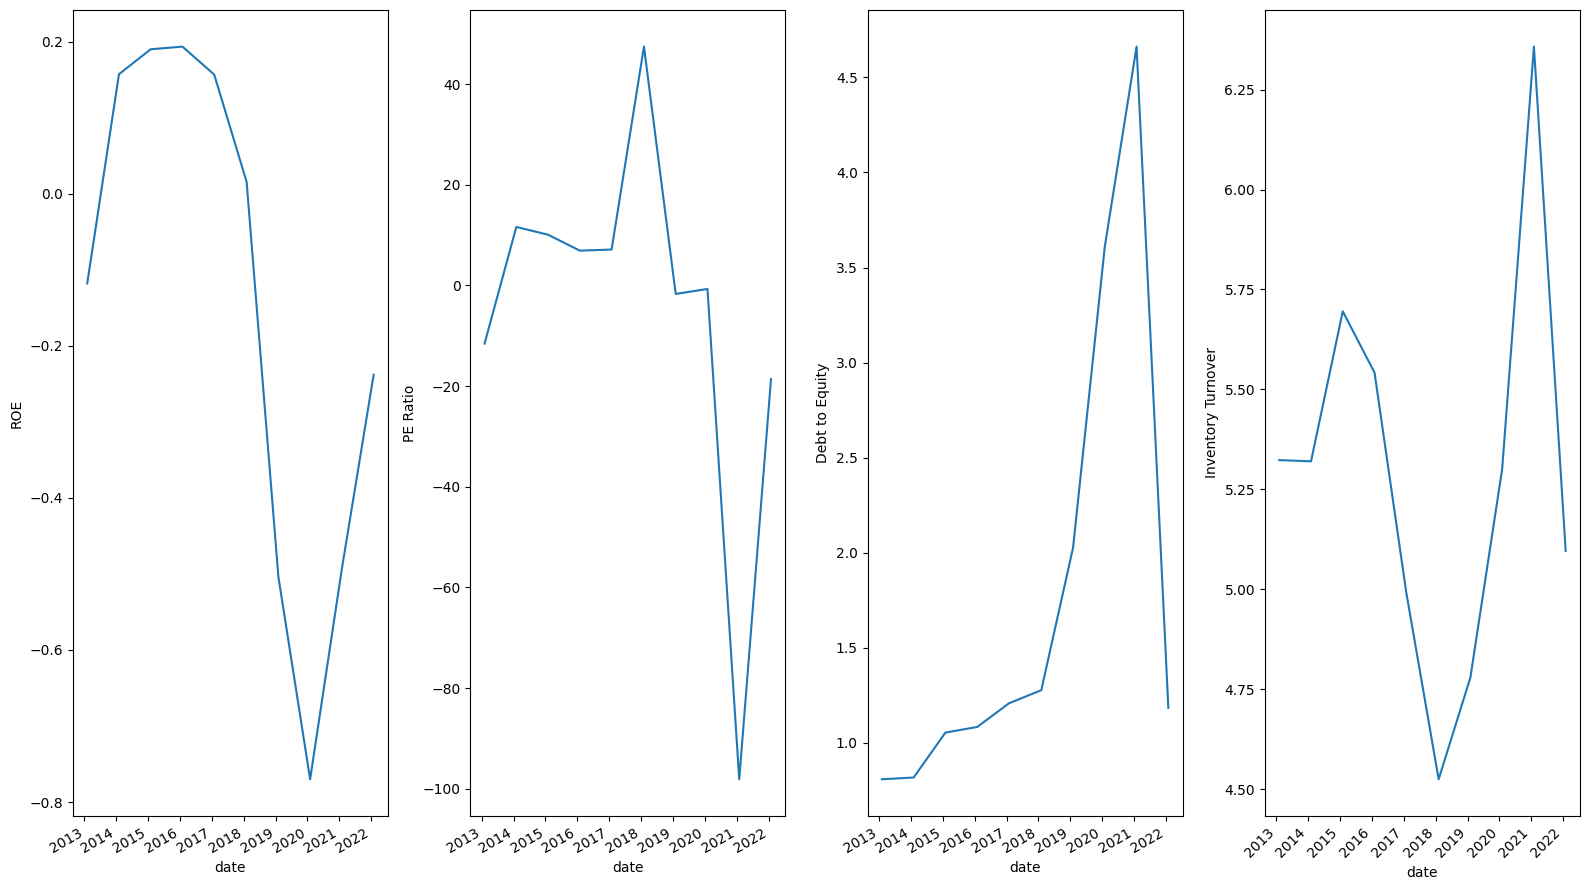

In [204]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Set date as the index
df_fundamentals['date'] = pd.to_datetime(df_fundamentals['date'])
df_fundamentals.set_index('date', inplace=True)

# Plot each column as a separate subplot
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,9))

df_fundamentals['roe'].plot(ax=axes[0], legend=False)
axes[0].set_ylabel('ROE')

df_fundamentals['peRatio'].plot(ax=axes[1], legend=False)
axes[1].set_ylabel('PE Ratio')

df_fundamentals['debtToEquity'].plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Debt to Equity')

df_fundamentals['inventoryTurnover'].plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Inventory Turnover')


date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [205]:
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/MGT5399/reddit_wsb.csv')

# Print the first 5 rows of the DataFrame
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56
...,...,...,...,...,...,...,...,...
53182,What I Learned Investigating SAVA FUD Spreaders,238,owd2pn,https://www.reddit.com/r/wallstreetbets/commen...,87,1.627906e+09,***TLDR: Three bitter scientists partnered up ...,2021-08-02 15:03:27
53183,"Daily Popular Tickers Thread for August 02, 20...",228,owd1a5,https://www.reddit.com/r/wallstreetbets/commen...,1070,1.627906e+09,\nYour daily hype thread. Please keep the shit...,2021-08-02 15:01:03
53184,Hitler reacts to the market being irrational,7398,owc5dr,https://v.redd.it/46jxu074exe71,372,1.627902e+09,NaN,2021-08-02 13:59:35
53185,"Daily Discussion Thread for August 02, 2021",338,owbfjf,https://www.reddit.com/r/wallstreetbets/commen...,11688,1.627898e+09,Your daily trading discussion thread. Please k...,2021-08-02 13:00:16


In [206]:
df = df.dropna(subset=['title', 'body'])
df = df[(~df['title'].str.contains(r'\b(robinhood|sec)\b', case=False)) & (~df['body'].str.contains(r'\b(robinhood|sec)\b', case=False)) & (df['title'].str.contains(r'\b(Gamestop|GME)\b', case=False) | df['body'].str.contains(r'\b(Gamestop|GME)\b', case=False))]
#titles and bodies that does not contain robinhood or sec but contains
df['date'] = pd.to_datetime(df['timestamp']).dt.date

# sort the DataFrame by the "date" column in ascending order
df = df.sort_values('date', ascending=True)
df

<ipython-input-206-c66e6a411c90>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[(~df['title'].str.contains(r'\b(robinhood|sec)\b', case=False)) & (~df['body'].str.contains(r'\b(robinhood|sec)\b', case=False)) & (df['title'].str.contains(r'\b(Gamestop|GME)\b', case=False) | df['body'].str.contains(r'\b(Gamestop|GME)\b', case=False))]
<ipython-input-206-c66e6a411c90>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['timestamp']).dt.date


,title,score,id,url,comms_num,created,body,timestamp,date
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,2021-01-28
674,Next GameStop. RYCEY ROLLS ROYCE,3,l6wyiq,https://www.reddit.com/r/wallstreetbets/commen...,0,1.611870e+09,RYCEY to the MOON!!! they can’t stop us all!!!...,2021-01-28 23:45:59,2021-01-28
679,RH bans buying GME AMC etc... interactive brok...,0,l6wyid,https://www.reddit.com/r/wallstreetbets/commen...,1,1.611870e+09,[https://ibkr.com/referral/serop525](https://i...,2021-01-28 23:45:59,2021-01-28
688,Give RH one star in app stores!,9,l6wygv,https://www.reddit.com/r/wallstreetbets/commen...,2,1.611870e+09,"\nCan’t buy AMC, BB, GME, NOK!\n\nLet’s move a...",2021-01-28 23:45:56,2021-01-28
692,HOLDHOLDHOLD,13,l6wygd,https://www.reddit.com/r/wallstreetbets/commen...,3,1.611870e+09,GME AND AMC HOLD AND BUY AT THE DIP. \nIf you...,2021-01-28 23:45:54,2021-01-28
...,...,...,...,...,...,...,...,...,...
52544,GROW: the same guy who discovered GME in June ...,0,p2ltzn,https://www.reddit.com/r/wallstreetbets/commen...,25,1.628715e+09,**Facts:**\n\n* Josh Klein is a deep-value in...,2021-08-11 23:50:57,2021-08-11
52559,Why Ford is Ready to Head towards 50$ starting...,108,p2ilxh,https://www.reddit.com/r/wallstreetbets/commen...,154,1.628705e+09,"^(I'm not a financial advisor, nor am I givin...",2021-08-11 21:09:16,2021-08-11
52491,CLOV🍀 you Irish fucks,753,p32sdk,https://www.reddit.com/r/wallstreetbets/commen...,134,1.628784e+09,"“August 12, 2021 10:57 AM ET (BZ Newswire) -- ...",2021-08-12 19:00:13,2021-08-12
52433,My loss porn this year (-$35k) with current aw...,84,p3mni4,https://www.reddit.com/r/wallstreetbets/commen...,49,1.628867e+09,I'm down almost $20k worth of deposits and -$3...,2021-08-13 18:08:37,2021-08-13


In [207]:
df = df.drop(columns=['url', 'created', 'id', 'score', 'comms_num', 'timestamp'])
df

,title,body,date
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,Hedgefund whales are spreading disinfo saying ...,2021-01-28
674,Next GameStop. RYCEY ROLLS ROYCE,RYCEY to the MOON!!! they can’t stop us all!!!...,2021-01-28
679,RH bans buying GME AMC etc... interactive brok...,[https://ibkr.com/referral/serop525](https://i...,2021-01-28
688,Give RH one star in app stores!,"\nCan’t buy AMC, BB, GME, NOK!\n\nLet’s move a...",2021-01-28
692,HOLDHOLDHOLD,GME AND AMC HOLD AND BUY AT THE DIP. \nIf you...,2021-01-28
...,...,...,...
52544,GROW: the same guy who discovered GME in June ...,**Facts:**\n\n* Josh Klein is a deep-value in...,2021-08-11
52559,Why Ford is Ready to Head towards 50$ starting...,"^(I'm not a financial advisor, nor am I givin...",2021-08-11
52491,CLOV🍀 you Irish fucks,"“August 12, 2021 10:57 AM ET (BZ Newswire) -- ...",2021-08-12
52433,My loss porn this year (-$35k) with current aw...,I'm down almost $20k worth of deposits and -$3...,2021-08-13


In [208]:
df_vader = df


In [209]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
# Words to not include in Word Clouds
my_stopwords = set(STOPWORDS)
# Additional phrases I don't want picked up in word clouds
my_stopwords.update(['https', 'http', '\n', '\t'])

In [210]:
def text_clean(mess):
    nopunct = [char for char in mess if char not in string.punctuation]
    nopunct = ''.join(nopunct)
    return nopunct

In [211]:
title_text = text_clean(df['title'])

In [212]:
body_text = text_clean(df['body'])

(-0.5, 399.5, 199.5, -0.5)

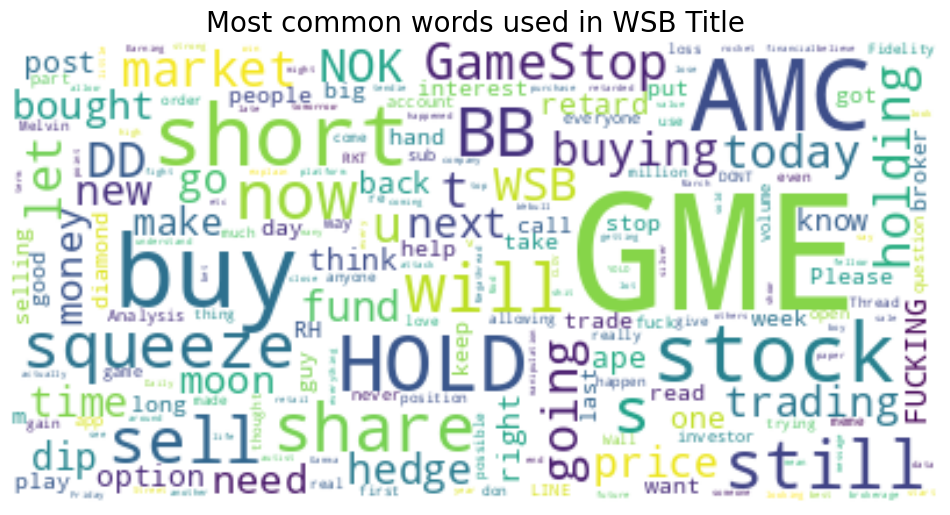

In [213]:
#Creating Title Word Cloud
title_wc = WordCloud(stopwords = my_stopwords, background_color='white', collocations = False).generate(title_text)
plt.figure(figsize=(12,10))
plt.imshow(title_wc, interpolation='bilinear')
plt.title('Most common words used in WSB Title', fontsize = 20)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

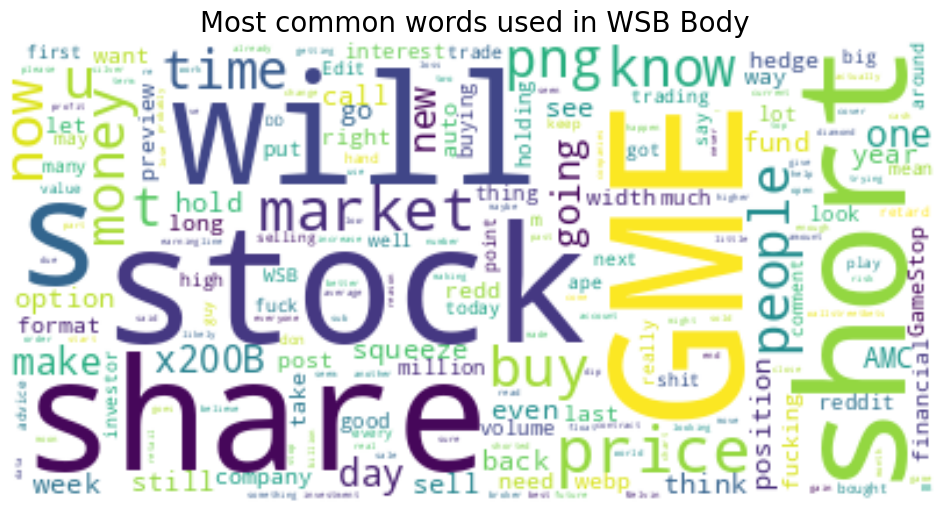

In [214]:
#Creating Title Word Cloud
title_wc = WordCloud(stopwords = my_stopwords, background_color='white', collocations = False).generate(body_text)
plt.figure(figsize=(12,10))
plt.imshow(title_wc, interpolation='bilinear')
plt.title('Most common words used in WSB Body', fontsize = 20)
plt.axis('off')

In [215]:
from textblob import TextBlob

# define a function to calculate the sentiment polarity score of a text
def get_sentiment_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# calculate the sentiment polarity score for each row and take the mean of the "title" and "body" scores
df['sentiment'] = df.apply(lambda row: max(get_sentiment_score(row['title']), get_sentiment_score(row['body'])), axis=1)


In [216]:
df['num_posts'] = df.groupby('date')['title'].transform('count')
df['date'] = pd.to_datetime(df['date'])
df['sentiment_avg'] = df.groupby(df['date'].dt.date)['sentiment'].transform('mean')
df

,title,body,date,sentiment,num_posts,sentiment_avg
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,Hedgefund whales are spreading disinfo saying ...,2021-01-28,0.000000,195,0.140423
674,Next GameStop. RYCEY ROLLS ROYCE,RYCEY to the MOON!!! they can’t stop us all!!!...,2021-01-28,0.000000,195,0.140423
679,RH bans buying GME AMC etc... interactive brok...,[https://ibkr.com/referral/serop525](https://i...,2021-01-28,1.000000,195,0.140423
688,Give RH one star in app stores!,"\nCan’t buy AMC, BB, GME, NOK!\n\nLet’s move a...",2021-01-28,0.000000,195,0.140423
692,HOLDHOLDHOLD,GME AND AMC HOLD AND BUY AT THE DIP. \nIf you...,2021-01-28,0.000000,195,0.140423
...,...,...,...,...,...,...
52544,GROW: the same guy who discovered GME in June ...,**Facts:**\n\n* Josh Klein is a deep-value in...,2021-08-11,0.111667,2,0.108565
52559,Why Ford is Ready to Head towards 50$ starting...,"^(I'm not a financial advisor, nor am I givin...",2021-08-11,0.105464,2,0.108565
52491,CLOV🍀 you Irish fucks,"“August 12, 2021 10:57 AM ET (BZ Newswire) -- ...",2021-08-12,0.000849,1,0.000849
52433,My loss porn this year (-$35k) with current aw...,I'm down almost $20k worth of deposits and -$3...,2021-08-13,0.121605,2,0.109846


In [217]:
df_gme['date'] = df_gme.index.date
df_gme['date'] = pd.to_datetime(df_gme['date'])
df_gme

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
Date,,,,,,,,
2013-03-28 00:00:00-04:00,4.459723,5.063772,4.459723,4.940136,39372800,0.0,0.0,2013-03-28
2013-04-01 00:00:00-04:00,4.945435,5.311044,4.933072,5.256291,28086000,0.0,0.0,2013-04-01
2013-04-02 00:00:00-04:00,5.252758,5.358732,5.132655,5.341070,16349200,0.0,0.0,2013-04-02
2013-04-03 00:00:00-04:00,5.346369,5.406421,5.298681,5.342837,18020400,0.0,0.0,2013-04-03
2013-04-04 00:00:00-04:00,5.335771,5.492966,5.208603,5.279252,17995200,0.0,0.0,2013-04-04
...,...,...,...,...,...,...,...,...
2023-03-21 00:00:00-04:00,17.150000,18.350000,17.139999,17.650000,15882900,0.0,0.0,2023-03-21
2023-03-22 00:00:00-04:00,26.600000,27.000000,23.049999,23.870001,66764700,0.0,0.0,2023-03-22
2023-03-23 00:00:00-04:00,22.570000,24.590000,22.129999,22.580000,11168900,0.0,0.0,2023-03-23


In [218]:
merged_df_gme = pd.merge(df_gme, df, on='date', how='left')

# filter out rows with dates outside the range of interest
start_date = pd.Timestamp('2021-01-28')
end_date = pd.Timestamp('2021-08-14')
merged_df_gme = merged_df_gme[(merged_df_gme['date'] >= start_date) & (merged_df_gme['date'] <= end_date)]

# group by date and aggregate the sentiment values
merged_df_gme = merged_df_gme.groupby('date').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'max', 'Dividends': 'max', 'Stock Splits': 'max', 'sentiment_avg': 'max','num_posts': 'max'})

# reset the index to include the "date" column
merged_df_gme = merged_df_gme.reset_index()
#merged_df_gme['avg_price'] = merged_df_gme[['Open', 'High', 'Low', 'Close']].mean(axis=1)
#USE CLOSING PRICE 
# print the resulting dataframe
merged_df_gme

,date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sentiment_avg,num_posts
0,2021-01-28,66.250000,120.750000,28.062500,48.400002,235263200,0.0,0.0,0.140423,195.0
1,2021-01-29,94.927498,103.495003,62.500000,81.250000,202264400,0.0,0.0,0.135371,2591.0
2,2021-02-01,79.139999,80.500000,53.000000,56.250000,149528800,0.0,0.0,0.118971,170.0
3,2021-02-02,35.189999,39.500000,18.555000,22.500000,312732400,0.0,0.0,0.141535,172.0
4,2021-02-03,28.002501,28.350000,21.312500,23.102501,170794000,0.0,0.0,0.138898,329.0
...,...,...,...,...,...,...,...,...,...,...
133,2021-08-09,37.950001,41.177502,37.665001,40.282501,8996800,0.0,0.0,0.846154,1.0
134,2021-08-10,40.340000,41.724998,38.837502,39.762501,6493200,0.0,0.0,NaN,NaN
135,2021-08-11,39.607498,39.762501,38.654999,39.695000,3781600,0.0,0.0,0.108565,2.0
136,2021-08-12,39.970001,41.070000,39.332500,40.587502,5271200,0.0,0.0,0.000849,1.0


In [219]:
# standardize the variables
merged_df_gme['Volume'] = (merged_df_gme['Volume'] - merged_df_gme['Volume'].mean()) / merged_df_gme['Volume'].std()
merged_df_gme['sentiment_avg'] = (merged_df_gme['sentiment_avg'] - merged_df_gme['sentiment_avg'].mean()) / merged_df_gme['sentiment_avg'].std()
merged_df_gme['num_posts'] = (merged_df_gme['num_posts'] - merged_df_gme['num_posts'].mean()) / merged_df_gme['num_posts'].std()
merged_df_gme['Close'] = (merged_df_gme['Close'] - merged_df_gme['Close'].mean()) / merged_df_gme['Close'].std()

# compute the correlation matrix
corr_matrix = merged_df_gme[['Volume', 'sentiment_avg', 'num_posts', 'Close']].corr()

# display the correlation matrix
print(corr_matrix)

                 Volume  sentiment_avg  num_posts     Close
Volume         1.000000      -0.237255   0.290665 -0.203596
sentiment_avg -0.237255       1.000000  -0.077013  0.067555
num_posts      0.290665      -0.077013   1.000000  0.152740
Close         -0.203596       0.067555   0.152740  1.000000


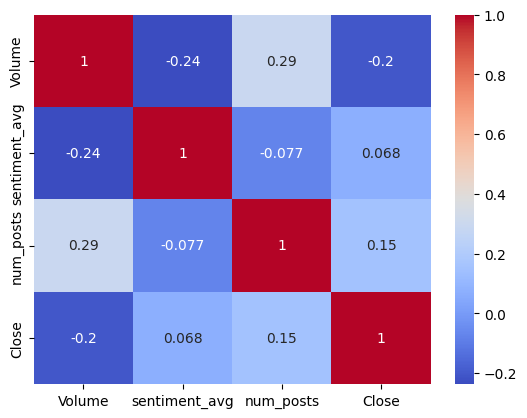

In [220]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# show the plot
plt.show()

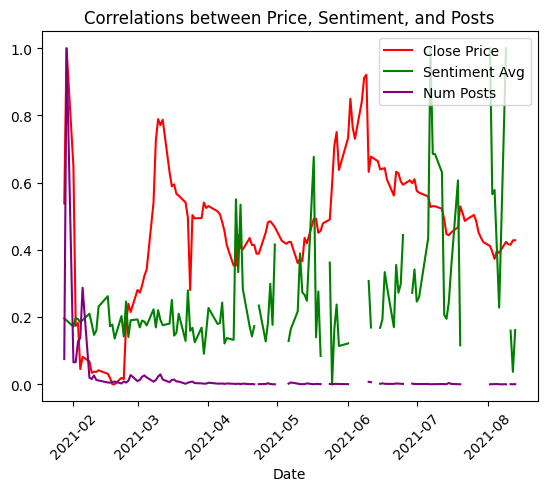

In [221]:
#WITHOUT WINSOR
# normalize the data using min-max scaling
avg_price_norm = (merged_df_gme['Close'] - merged_df_gme['Close'].min()) / (merged_df_gme['Close'].max() - merged_df_gme['Close'].min())
sentiment_norm = (merged_df_gme['sentiment_avg'] - merged_df_gme['sentiment_avg'].min()) / (merged_df_gme['sentiment_avg'].max() - merged_df_gme['sentiment_avg'].min())
posts_norm = (merged_df_gme['num_posts'] - merged_df_gme['num_posts'].min()) / (merged_df_gme['num_posts'].max() - merged_df_gme['num_posts'].min())

# create a figure and axis object
fig, ax = plt.subplots()

# plot the normalized data on the same y-axis
ax.plot(merged_df_gme['date'], avg_price_norm, color='red', label='Close Price')
ax.plot(merged_df_gme['date'], sentiment_norm, color='green', label='Sentiment Avg')
ax.plot(merged_df_gme['date'], posts_norm, color='purple', label='Num Posts')

# set the x-axis label and title
ax.set_xlabel('Date')
ax.set_title('Correlations between Price, Sentiment, and Posts')
plt.xticks(rotation=45)
# create a legend
ax.legend()

# display the plot
plt.show()

In [222]:
from scipy.stats.mstats import winsorize

# winsorize the sentiment_avg and num_posts columns
sentiment_winsorized = winsorize(merged_df_gme['sentiment_avg'], limits=[0.1, 0.1])
posts_winsorized = winsorize(merged_df_gme['num_posts'], limits=[0.1, 0.1])

# add the winsorized columns to the merged_df_gme dataframe
merged_df_gme['sentiment_winsorized'] = sentiment_winsorized
merged_df_gme['posts_winsorized'] = posts_winsorized

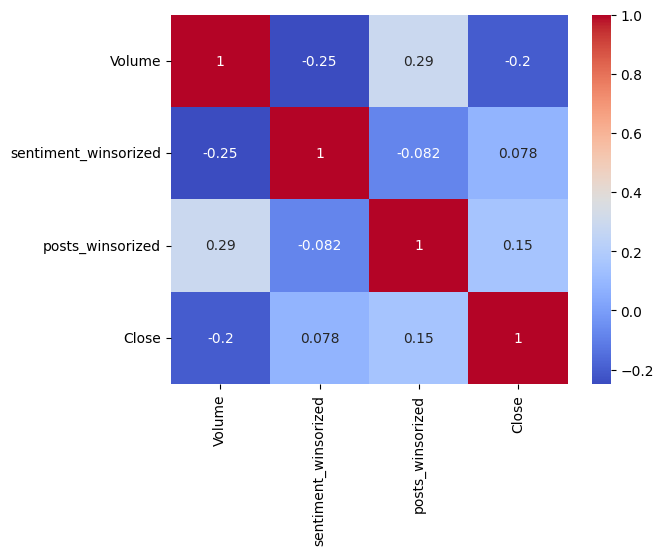

In [223]:
# standardize the variables
merged_df_gme['Volume'] = (merged_df_gme['Volume'] - merged_df_gme['Volume'].mean()) / merged_df_gme['Volume'].std()
merged_df_gme['sentiment_winsorized'] = (merged_df_gme['sentiment_winsorized'] - merged_df_gme['sentiment_winsorized'].mean()) / merged_df_gme['sentiment_winsorized'].std()
merged_df_gme['posts_winsorized'] = (merged_df_gme['posts_winsorized'] - merged_df_gme['posts_winsorized'].mean()) / merged_df_gme['posts_winsorized'].std()
merged_df_gme['Close'] = (merged_df_gme['Close'] - merged_df_gme['Close'].mean()) / merged_df_gme['Close'].std()

# compute the correlation matrix
corr_matrix = merged_df_gme[['Volume', 'sentiment_winsorized', 'posts_winsorized', 'Close']].corr()

# display the correlation matrix
#print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# show the plot
plt.show()

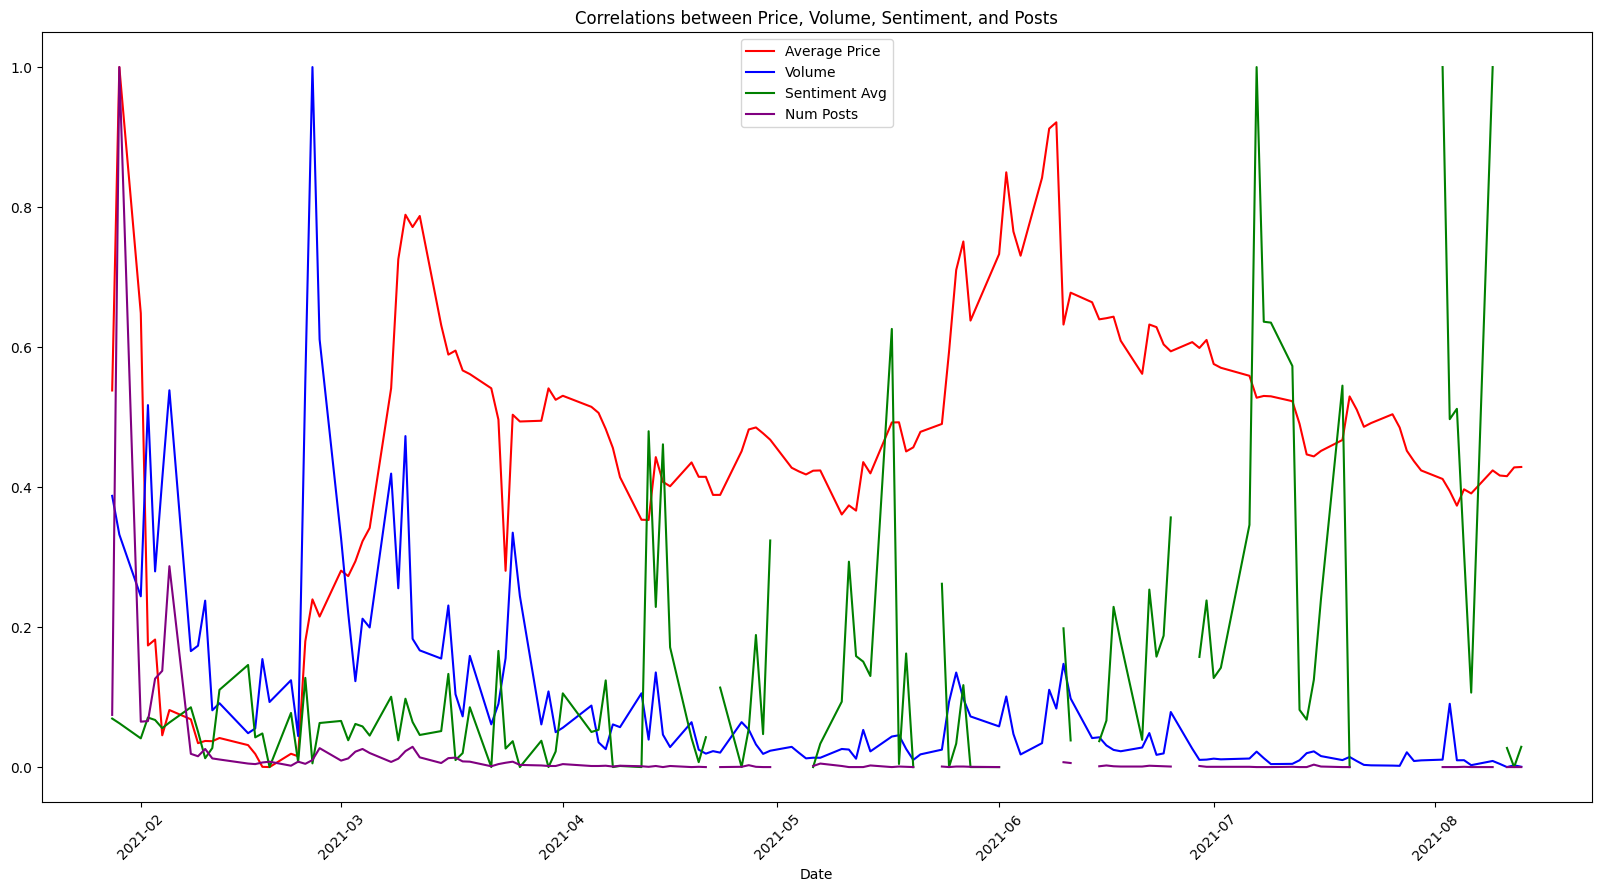

In [224]:

# normalize the data using min-max scaling
avg_price_norm = (merged_df_gme['Close'] - merged_df_gme['Close'].min()) / (merged_df_gme['Close'].max() - merged_df_gme['Close'].min())
volume_norm = (merged_df_gme['Volume'] - merged_df_gme['Volume'].min()) / (merged_df_gme['Volume'].max() - merged_df_gme['Volume'].min())
sentiment_norm = (merged_df_gme['sentiment_winsorized'] - merged_df_gme['sentiment_winsorized'].min()) / (merged_df_gme['sentiment_winsorized'].max() - merged_df_gme['sentiment_winsorized'].min())
posts_norm = (merged_df_gme['posts_winsorized'] - merged_df_gme['posts_winsorized'].min()) / (merged_df_gme['posts_winsorized'].max() - merged_df_gme['posts_winsorized'].min())

# create a figure and axis object
fig, ax = plt.subplots(figsize = (20,10))

# plot the normalized data on the same y-axis
ax.plot(merged_df_gme['date'], avg_price_norm, color='red', label='Average Price')
ax.plot(merged_df_gme['date'], volume_norm, color='blue', label='Volume')
ax.plot(merged_df_gme['date'], sentiment_norm, color='green', label='Sentiment Avg')
ax.plot(merged_df_gme['date'], posts_norm, color='purple', label='Num Posts')

# set the x-axis label and title
ax.set_xlabel('Date')
ax.set_title('Correlations between Price, Volume, Sentiment, and Posts')

# create a legend
ax.legend()
plt.xticks(rotation=45)

# display the plot
plt.show()

In [225]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# initialize the analyzer
analyzer = SentimentIntensityAnalyzer()

# define a function to get the mean sentiment score for a row
def get_sentiment_score(row):
    title_score = analyzer.polarity_scores(row['title'])['compound']
    body_score = analyzer.polarity_scores(row['body'])['compound']
    return max(title_score,body_score)

# apply the function to each row to get the sentiment score
df_vader['sentiment'] = df_vader.apply(get_sentiment_score, axis=1)

# print the sentiment scores


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [292]:
df_vader['num_posts'] = df_vader.groupby('date')['title'].transform('count')
df_vader['date'] = pd.to_datetime(df_vader['date'])
df_vader['sentiment_avg'] = df_vader.groupby(df_vader['date'].dt.date)['sentiment'].transform('mean')
df_vader

,title,body,date,sentiment,num_posts,sentiment_avg
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,Hedgefund whales are spreading disinfo saying ...,2021-01-28,0.8663,195,0.322414
674,Next GameStop. RYCEY ROLLS ROYCE,RYCEY to the MOON!!! they can’t stop us all!!!...,2021-01-28,0.0000,195,0.322414
679,RH bans buying GME AMC etc... interactive brok...,[https://ibkr.com/referral/serop525](https://i...,2021-01-28,0.7249,195,0.322414
688,Give RH one star in app stores!,"\nCan’t buy AMC, BB, GME, NOK!\n\nLet’s move a...",2021-01-28,0.0000,195,0.322414
692,HOLDHOLDHOLD,GME AND AMC HOLD AND BUY AT THE DIP. \nIf you...,2021-01-28,0.0000,195,0.322414
...,...,...,...,...,...,...
52544,GROW: the same guy who discovered GME in June ...,**Facts:**\n\n* Josh Klein is a deep-value in...,2021-08-11,0.9155,2,0.955100
52559,Why Ford is Ready to Head towards 50$ starting...,"^(I'm not a financial advisor, nor am I givin...",2021-08-11,0.9947,2,0.955100
52491,CLOV🍀 you Irish fucks,"“August 12, 2021 10:57 AM ET (BZ Newswire) -- ...",2021-08-12,0.9466,1,0.946600
52433,My loss porn this year (-$35k) with current aw...,I'm down almost $20k worth of deposits and -$3...,2021-08-13,-0.5106,2,0.244500


In [294]:
merged_df_gme_vader = pd.merge(df_gme, df_vader, on='date', how='left')

# filter out rows with dates outside the range of interest
start_date = pd.Timestamp('2021-01-28')
end_date = pd.Timestamp('2021-08-14')
merged_df_gme_vader = merged_df_gme_vader[(merged_df_gme_vader['date'] >= start_date) & (merged_df_gme_vader['date'] <= end_date)]

# group by date and aggregate the sentiment values
merged_df_gme_vader = merged_df_gme_vader.groupby('date').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'max', 'Dividends': 'max', 'Stock Splits': 'max', 'sentiment_avg': 'max','num_posts': 'max'})

# reset the index to include the "date" column
merged_df_gme_vader = merged_df_gme_vader.reset_index()
#merged_df_gme['avg_price'] = merged_df_gme[['Open', 'High', 'Low', 'Close']].mean(axis=1)
#USE CLOSING PRICE 
# print the resulting dataframe
merged_df_gme_vader['PriceChg'] = (merged_df_gme_vader['Close'] - merged_df_gme_vader['Open']) / merged_df_gme_vader['Open']

merged_df_gme_vader

,date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sentiment_avg,num_posts,PriceChg
0,2021-01-28,66.250000,120.750000,28.062500,48.400002,235263200,0.0,0.0,0.322414,195.0,-0.269434
1,2021-01-29,94.927498,103.495003,62.500000,81.250000,202264400,0.0,0.0,0.260548,2591.0,-0.144084
2,2021-02-01,79.139999,80.500000,53.000000,56.250000,149528800,0.0,0.0,0.581149,170.0,-0.289234
3,2021-02-02,35.189999,39.500000,18.555000,22.500000,312732400,0.0,0.0,0.484962,172.0,-0.360614
4,2021-02-03,28.002501,28.350000,21.312500,23.102501,170794000,0.0,0.0,0.508395,329.0,-0.174984
...,...,...,...,...,...,...,...,...,...,...,...
133,2021-08-09,37.950001,41.177502,37.665001,40.282501,8996800,0.0,0.0,0.504000,1.0,0.061462
134,2021-08-10,40.340000,41.724998,38.837502,39.762501,6493200,0.0,0.0,NaN,NaN,-0.014316
135,2021-08-11,39.607498,39.762501,38.654999,39.695000,3781600,0.0,0.0,0.955100,2.0,0.002209
136,2021-08-12,39.970001,41.070000,39.332500,40.587502,5271200,0.0,0.0,0.946600,1.0,0.015449


                 Volume  sentiment_avg  num_posts     Close  PriceChg
Volume         1.000000      -0.329706   0.290665 -0.203596 -0.023527
sentiment_avg -0.329706       1.000000  -0.300743  0.087032  0.147226
num_posts      0.290665      -0.300743   1.000000  0.152740 -0.128538
Close         -0.203596       0.087032   0.152740  1.000000  0.081852
PriceChg      -0.023527       0.147226  -0.128538  0.081852  1.000000


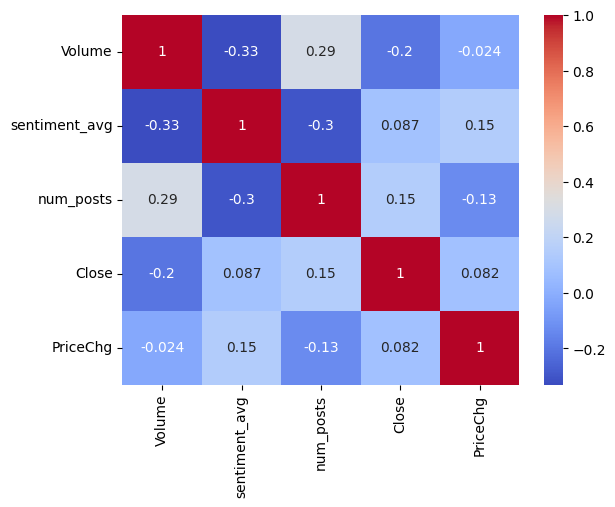

In [296]:
merged_df_gme_vader['Volume'] = (merged_df_gme_vader['Volume'] - merged_df_gme_vader['Volume'].mean()) / merged_df_gme_vader['Volume'].std()
merged_df_gme_vader['sentiment_avg'] = (merged_df_gme_vader['sentiment_avg'] - merged_df_gme_vader['sentiment_avg'].mean()) / merged_df_gme_vader['sentiment_avg'].std()
merged_df_gme_vader['num_posts'] = (merged_df_gme_vader['num_posts'] - merged_df_gme_vader['num_posts'].mean()) / merged_df_gme_vader['num_posts'].std()
merged_df_gme_vader['Close'] = (merged_df_gme_vader['Close'] - merged_df_gme_vader['Close'].mean()) / merged_df_gme_vader['Close'].std()
merged_df_gme_vader['PriceChg'] = (merged_df_gme_vader['PriceChg'] - merged_df_gme_vader['PriceChg'].mean()) / merged_df_gme_vader['PriceChg'].std()

# compute the correlation matrix
corr_matrix = merged_df_gme_vader[['Volume', 'sentiment_avg', 'num_posts', 'Close','PriceChg']].corr()

# display the correlation matrix
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# show the plot
plt.show()

In [246]:
!pip install --upgrade pip
!pip install pygooglenews --no-deps
!pip install feedparser
!pip install dateparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.8/293.8 kB 8.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pygooglenews 0.1.2 requires dateparser<0.8.0,>=0.7.6, but you have dateparser 1.1.8 which is incompatible.
pygooglenews 0.1.2 requires feedparser<6.0.0,>=5.2.1, but you have feedparser 6.0.10 which is incompatible.


In [290]:
from pygooglenews import GoogleNews
gn = GoogleNews()
search = gn.search('Gamestop', when = '8d',helper = False)

# Create a list to hold the data
data = []

# Iterate through each article in the search results
for article in search['entries']:
    # Extract the title and date strings
    title = article['title']
    raw_date = article['published']

    # Convert the date string to a datetime object
    date = pd.to_datetime(raw_date)

    # Format the datetime object as a string in the YYYY-MM-DD format
    date_str = date.strftime('%Y-%m-%d')

    # Add the title, raw date, and formatted date to the data list
    data.append([title, raw_date, date_str])

# Create a DataFrame from the data list
df_news = pd.DataFrame(data, columns=['Title', 'Raw Date', 'Date'])

# Sort the DataFrame by the Raw Date column in descending order
df_news = df_news.sort_values(by='Raw Date', ascending=False)

# Print the sorted DataFrame
df_news


,Title,Raw Date,Date
43,Nine Must Reads for the CRE Industry Today (Ma...,"Wed, 29 Mar 2023 19:05:02 GMT",2023-03-29
22,GameStop Gets 'Killer Klowns' 35th Anniversary...,"Wed, 29 Mar 2023 18:49:14 GMT",2023-03-29
18,This Is What Whales Are Betting On GameStop - ...,"Wed, 29 Mar 2023 18:30:41 GMT",2023-03-29
39,Pokemon player makes shocking realization abou...,"Wed, 29 Mar 2023 18:20:27 GMT",2023-03-29
45,Animal Spirits Are Returning… With Mixed Resul...,"Wed, 29 Mar 2023 18:15:00 GMT",2023-03-29
...,...,...,...
51,Wall Street lines up against SEC chair Gary Ge...,"Fri, 31 Mar 2023 13:12:20 GMT",2023-03-31
7,Receive a Flying Tera-Type Lechonk at GameStop...,"Fri, 31 Mar 2023 13:09:39 GMT",2023-03-31
95,Shiba Inu: 'Puppynet' Processes 1 Million Tran...,"Fri, 31 Mar 2023 12:29:10 GMT",2023-03-31
32,AMC Stock: Amazon Acquisition Rumors Add More ...,"Fri, 31 Mar 2023 10:49:19 GMT",2023-03-31


In [298]:
!pip install finnhub-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [305]:
import finnhub
finnhub_client = finnhub.Client(api_key="cgmsun9r01qhveussecgcgmsun9r01qhveussed0")

news = finnhub_client.company_news('GME', _from="2022-01-01", to="2023-04-01")


# create dataframe
df_finhub = pd.DataFrame(news, columns=["headline", "datetime","summary","url"])

# convert datetime to 2023-01-01 format
df_finhub["datetime"] = pd.to_datetime(df_finhub["datetime"], unit='s').dt.strftime('%Y-%m-%d')

# display dataframe
df_finhub

,headline,datetime,summary,url
0,Bed Bath & Beyond stock closes at all-time low...,2023-03-31,Bed Bath & Beyond’s (BBBY) stock ended the qua...,https://finnhub.io/api/news?id=d03a329c5508980...
1,Bed Bath & Beyond stock closes at all-time low...,2023-03-31,Bed Bath & Beyond’s (BBBY) stock ended the qua...,https://finnhub.io/api/news?id=910da117753be56...
2,Teaching Financial Literacy: Why You Need to S...,2023-03-31,Teaching financial literacy to kids can help t...,https://finnhub.io/api/news?id=c21183d7cd12817...
3,There May Be Hope on the Horizon for GameStop ...,2023-03-31,A position in video game retailer GameStop (NY...,https://finnhub.io/api/news?id=7b04b55f6758c95...
4,How To Avoid Losing Money Through The Volatility,2023-03-31,"Kirk Spano, who runs Margin of Safety Investin...",https://finnhub.io/api/news?id=93225b2da0a47bb...
...,...,...,...,...
219,SEC Filing: Michael Burry Bought These Under-T...,2023-02-15,Michael Burry is among the best value investor...,https://finnhub.io/api/news?id=44fc7f665718d32...
220,Want to play the lottery? These are the most s...,2023-02-15,Looking for stock market analysis and research...,https://finnhub.io/api/news?id=6adc136a28810b0...
221,3 Stocks to Sell Before the Dot-Com Crash 2.0,2023-02-15,Looking for stock market analysis and research...,https://finnhub.io/api/news?id=039a522fec3f958...
222,Wall Street watchdog set to adopt rules aimed ...,2023-02-15,Wall Street's top regulator was poised Wednesd...,https://finnhub.io/api/news?id=23a1f918ccdbf8e...
